In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score
from sklearn.datasets import load_breast_cancer
from scipy.stats import randint

# Load breast cancer dataset
data = load_breast_cancer()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=0)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Select best features using SelectKBest
kbest = SelectKBest(k=10)
X_train = kbest.fit_transform(X_train, y_train)
X_test = kbest.transform(X_test)

# Define a range of hyperparameters to search over
param_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': [None] + list(randint(1, 10).rvs(9)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5)
}

# Create random forest classifier
rfc = RandomForestClassifier()

# Use randomized search to find the best hyperparameters
clf = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1)
clf.fit(X_train, y_train)

# Print the best hyperparameters found by randomized search
print("Best hyperparameters found by randomized search:")
print(clf.best_params_)



Best hyperparameters found by randomized search:
{'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 35}


In [48]:
# Train random forest classifier on training set with best hyperparameters
rfc_best = RandomForestClassifier(**clf.best_params_)
rfc_best.fit(X_train, y_train)

# Predict labels on testing set
y_pred = rfc_best.predict(X_test)

# Measure prediction score using F1-score
score = f1_score(y_test, y_pred)
print("Prediction score with best hyperparameters: {:.2f}%".format(score*100))

Prediction score with best hyperparameters: 96.30%


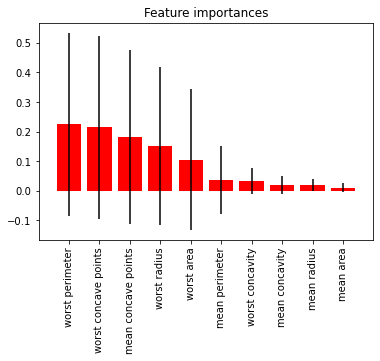

In [50]:
# Plot feature importances
importances = rfc_best.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_best.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
features = data.feature_names[kbest.get_support()]
plt.figure()

plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

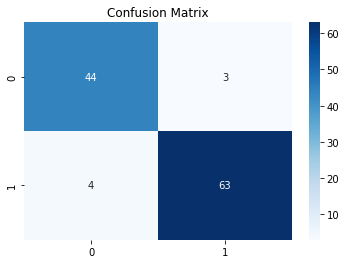

In [45]:
 # Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.show()